<a href="https://colab.research.google.com/github/kartoone/cosc470/blob/main/examplecode/FastNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Hello, world** of neural networks
This code builds a simple neural network that can recognize handwritten 28x28 pixel digits.

Our first version will have 15 neurons in the hidden layer and 10 output neurons.

See image below:
http://neuralnetworksanddeeplearning.com/images/tikz12.png

How many weights in this network?
11760 weights in the first layer (784 * 15) and 150 weights in the second layer (15 * 10) = 11910 weights total
15 biases in the hidden layer and 10 biases in the output layer = 25 biases total.
11910 + 25 = 11935 parameters!

In [ ]:
%cd /content
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd /content/nn

/content
Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 63 (delta 30), reused 28 (delta 28), pack-reused 21 (from 1)
Receiving objects: 100% (63/63), 16.43 MiB | 17.86 MiB/s, done.
Resolving deltas: 100% (31/31), done.
/content/nn


In [ ]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)


In [ ]:
import numpy as np
print(len(training_data[0]))
print(len(training_data[0][0]))
print(len(training_data[0][1]))
print(training_data[0][1])
np.set_printoptions(linewidth=np.inf)
print(np.reshape(training_data[0][0],(28,28)))

2
784
10
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.       

In [ ]:
print(len(test_data))
print(len(test_data[0]))
print(test_data[0][1])
print(np.reshape(test_data[0][0],(28,28)))

10000
2
7
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         

In [ ]:
import network
net = network.Network([784, 30, 10])
net.SGD(training_data, 5, 10, 3.0, test_data=test_data)

Epoch 0 : 9107 / 10000
Epoch 1 : 9203 / 10000
Epoch 2 : 9257 / 10000
Epoch 3 : 9372 / 10000
Epoch 4 : 9329 / 10000


In [ ]:
print(np.shape(net.weights[0]))
print(net.weights[0])

In [ ]:
print(np.shape(net.weights[1]))
print(net.weights[1])

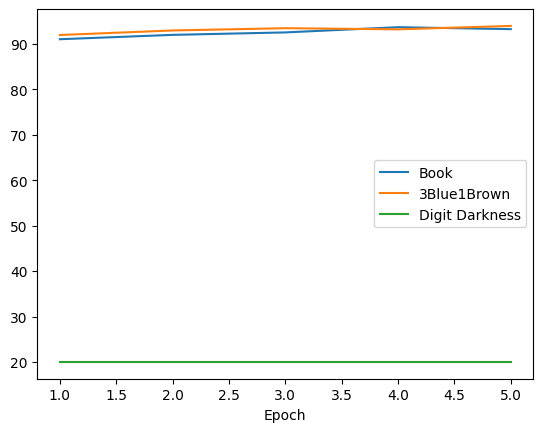

In [4]:
book = [91.07, 92.03, 92.57, 93.72, 93.29]
blue3brown1 = [92.00,93.00,93.50,93.25,94.00]
digitdarkness = [20, 20, 20, 20, 20]

import matplotlib.pyplot as plt
import numpy as np
# Create an array of x-values corresponding to epoch numbers (1, 2, 3, ...)
epochs = np.arange(1, len(book) + 1)

# Plot each list on the same chart
plt.plot(epochs, book, label='Book')
plt.plot(epochs, blue3brown1, label='3Blue1Brown')
plt.plot(epochs, digit, label='Digit Darkness')

# Label the x-axis and add a legend
plt.xlabel('Epoch')
plt.legend()

# Display the plot
plt.show()